# **Task - 1:**

Repeat all the task from worksheet - 5 but, try to improve the model from last week with same dataset.

• Use Data Augmentation to increase the number of training image.

• Use deeper model with BN and DropOut layer as presented above.

• Understand the Model Summary and Training Behavior.

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
#train image data
train_df = "/content/drive/MyDrive/AI&ML -level6/Worksheet/FruitinAmazon/FruitinAmazon/train"

#test image data
test_df = "/content/drive/MyDrive/AI&ML -level6/Worksheet/FruitinAmazon/FruitinAmazon/test"

In [4]:
import os
import random
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.preprocessing import image_dataset_from_directory

In [5]:
import os
# Get class names (subdirectories)
class_names = sorted(os.listdir(train_df))

if not class_names:
    print("No class directories found in the train folder!")
else:
    print(f"Found {len(class_names)} classes: {class_names}")

Found 6 classes: ['acai', 'cupuacu', 'graviola', 'guarana', 'pupunha', 'tucuma']


In [6]:
from PIL import Image, UnidentifiedImageError
corrupted_images = []  # List to store corrupted image paths

# Loop through each class folder and check for corrupted images
for class_name in class_names:
    class_path = os.path.join(train_df, class_name)
    if os.path.isdir(class_path):  # Ensure it’s a valid directory
        images = os.listdir(class_path)
        for img_name in images:
            img_path = os.path.join(class_path, img_name)
            try:
                with Image.open(img_path) as img:
                    img.verify()  # Verify image integrity
            except (IOError, UnidentifiedImageError):
                corrupted_images.append(img_path)

# Print results
if corrupted_images:
    print("\nCorrupted Images Found:")
    for img in corrupted_images:
        print(img)
else:
    print("\nNo corrupted images found.")



No corrupted images found.


In [7]:
# Dictionary to store class counts
class_counts = {}

for class_name in class_names:
    class_path = os.path.join(train_df, class_name)
    if os.path.isdir(class_path):
        images = [img for img in os.listdir(class_path) if img.lower().endswith(('.png', '.jpg', '.jpeg'))]
        class_counts[class_name] = len(images)  # Count images in each class

# Print Class Balance
print("\nClass Distribution:")
print("=" * 45)
print(f"{'Class Name':<25}{'Valid Image Count':>15}")
print("=" * 45)
for class_name, count in class_counts.items():
    print(f"{class_name:<25}{count:>15}")
print("=" * 45)


Class Distribution:
Class Name               Valid Image Count
acai                                  15
cupuacu                               15
graviola                              15
guarana                               15
pupunha                               15
tucuma                                15


In [8]:
selected_images = []  # Store image paths
selected_labels = []  # Store corresponding class names

for class_name in class_names:
    class_path = os.path.join(train_df, class_name)
    if os.path.isdir(class_path):
        images = [img for img in os.listdir(class_path) if img.lower().endswith(('.png', '.jpg', '.jpeg'))]
        if images:  # Ensure the class folder is not empty
            selected_img = os.path.join(class_path, random.choice(images))
            selected_images.append(selected_img)
            selected_labels.append(class_name)

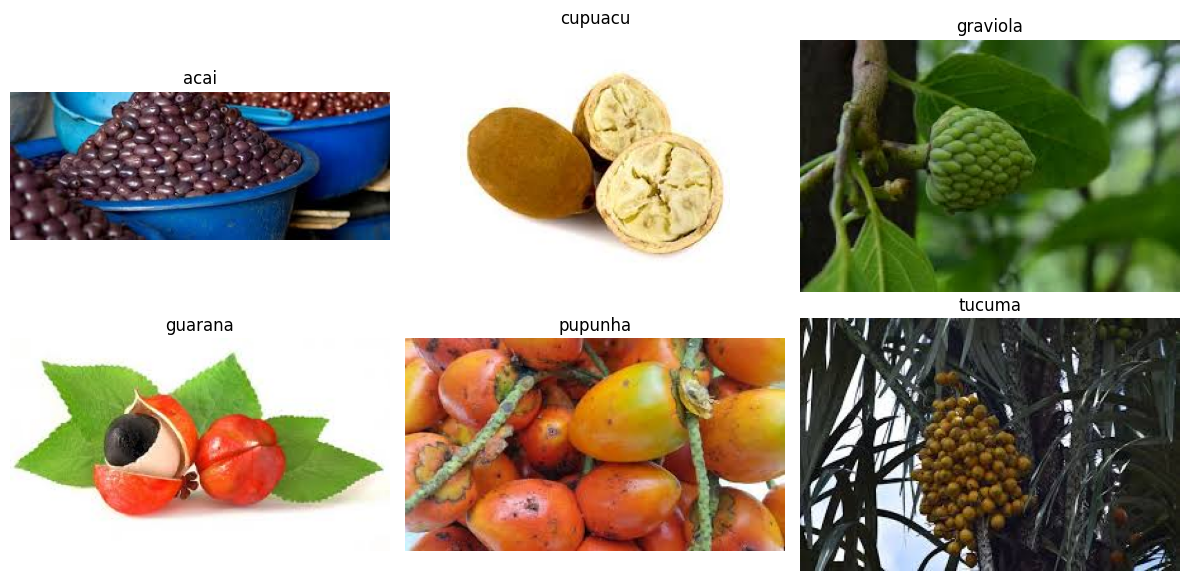

In [9]:
import matplotlib.image as mpimg

# Determine grid size
num_classes = len(selected_images)
cols = (num_classes + 1) // 2  # Determine number of columns
rows = 2  # Fixed number of rows for layout

fig, axes = plt.subplots(rows, cols, figsize=(12, 6))

for i, ax in enumerate(axes.flat):
    if i < num_classes:
        img = mpimg.imread(selected_images[i])
        ax.imshow(img)
        ax.set_title(selected_labels[i])
        ax.axis("off")
    else:
        ax.axis("off")  # Hide unused subplots

plt.tight_layout()
plt.show()

In [10]:
def load_datasets(dataset_path, img_size=(128, 128), batch_size=32):
    train_ds = image_dataset_from_directory(
        dataset_path,
        validation_split=0.2,
        subset="training",
        seed=42,
        image_size=img_size,
        batch_size=batch_size
    )
    val_ds = image_dataset_from_directory(
        dataset_path,
        validation_split=0.2,
        subset="validation",
        seed=42,
        image_size=img_size,
        batch_size=batch_size
    )
    return train_ds, val_ds

train_ds, val_ds = load_datasets(train_df)

Found 90 files belonging to 6 classes.
Using 72 files for training.
Found 90 files belonging to 6 classes.
Using 18 files for validation.


In [11]:
def build_cnn_model(input_shape, num_classes):
    cnn_model = models.Sequential([
        layers.Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=input_shape),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(32, (3, 3), activation='relu', padding='same'),
        layers.MaxPooling2D((2, 2)),
        layers.Flatten(),
        layers.Dense(64, activation='relu'),
        layers.Dense(128, activation='relu'),
        layers.Dense(num_classes, activation='softmax')
    ])
    return cnn_model

# Example usage:
input_shape = (128, 128, 3)
class_names = train_ds.class_names
cnn_model = build_cnn_model(input_shape, len(class_names))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [12]:
def compile_model(model):
    cnn_model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    return cnn_model

# Example usage:
cnn_model = compile_model(cnn_model)
cnn_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 128, 128, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 64, 64, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 64, 64, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 32, 32, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 32768)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │       2,097,216 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 128)                 │           8,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 6)                   │             774 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,116,454 (8.07 MB)

 Trainable params: 2,116,454 (8.07 MB)

 Non-trainable params: 0 (0.00 B)

In [13]:
def train_model(model, train_ds, val_ds, epochs=250, batch_size=16):
    callbacks = [
        keras.callbacks.ModelCheckpoint("best_model.h5", save_best_only=True),
        keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)
    ]
    cnn_model.fit(train_ds, validation_data=val_ds, epochs=epochs, batch_size=batch_size, callbacks=callbacks)
    return cnn_model

# Example usage:
cnn_model = train_model(cnn_model, train_ds, val_ds)

Epoch 1/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 393ms/step - accuracy: 0.1858 - loss: 250.2906

3/3 ━━━━━━━━━━━━━━━━━━━━ 4s 677ms/step - accuracy: 0.1810 - loss: 276.8458 - val_accuracy: 0.2222 - val_loss: 246.1533
Epoch 2/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 354ms/step - accuracy: 0.1551 - loss: 262.3507

3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 564ms/step - accuracy: 0.1545 - loss: 254.6827 - val_accuracy: 0.2778 - val_loss: 65.1568
Epoch 3/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 569ms/step - accuracy: 0.2153 - loss: 56.6314

3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 808ms/step - accuracy: 0.2135 - loss: 55.1637 - val_accuracy: 0.1667 - val_loss: 26.5501
Epoch 4/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 553ms/step - accuracy: 0.3698 - loss: 14.6332

3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 764ms/step - accuracy: 0.3711 - loss: 14.5348 - val_accuracy: 0.1667 - val_loss: 8.3681
Epoch 5/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 350ms/step - accuracy: 0.3993 - loss: 4.3018

3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 485ms/step - accuracy: 0.4036 - loss: 4.2664 - val_accuracy: 0.4444 - val_loss: 2.4414
Epoch 6/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 344ms/step - accuracy: 0.5405 - loss: 1.5896

3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 477ms/step - accuracy: 0.5373 - loss: 1.5995 - val_accuracy: 0.3889 - val_loss: 2.0441
Epoch 7/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 347ms/step - accuracy: 0.5637 - loss: 1.2062

3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 480ms/step - accuracy: 0.5720 - loss: 1.1884 - val_accuracy: 0.3889 - val_loss: 1.8012
Epoch 8/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 341ms/step - accuracy: 0.6296 - loss: 0.8181

3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 477ms/step - accuracy: 0.6319 - loss: 0.8239 - val_accuracy: 0.3333 - val_loss: 1.6205
Epoch 9/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 522ms/step - accuracy: 0.7943 - loss: 0.8248 - val_accuracy: 0.3333 - val_loss: 1.6297
Epoch 10/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 746ms/step - accuracy: 0.8641 - loss: 0.8031 - val_accuracy: 0.3333 - val_loss: 1.7816
Epoch 11/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 646ms/step - accuracy: 0.8602 - loss: 0.6810 - val_accuracy: 0.3889 - val_loss: 1.8083
Epoch 12/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 429ms/step - accuracy: 0.9410 - loss: 0.4337 - val_accuracy: 0.3889 - val_loss: 1.7489
Epoch 13/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 428ms/step - accuracy: 0.9783 - loss: 0.2435 - val_accuracy: 0.3889 - val_loss: 2.0901
Epoch 14/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 444ms/step - accuracy: 0.9813 - loss: 0.1278 - val_accuracy: 0.3889 - val_loss: 2.7006
Epoch 15/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 438ms/step - accuracy: 1.0000 - loss: 0.0512 - val_accuracy: 0.4444 - val_los

In [14]:
def evaluate_model(model, test_ds):
    test_loss, test_acc = model.evaluate(test_ds)
    print(f"Test Accuracy: {test_acc:.4f}")
    print(f"Test Loss: {test_loss:.4f}")
    #return test_loss, test_acc

# Example usage:
evaluate_model(cnn_model, val_ds)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 167ms/step - accuracy: 0.3333 - loss: 1.6205
Test Accuracy: 0.3333
Test Loss: 1.6205


In [15]:
def save_model(model, filename="model.h5"):
    model.save(filename)

def load_model(filename="model.h5"):
    return keras.models.load_model(filename)

save_model(cnn_model)
cnn_model = load_model()

In [16]:
from sklearn.metrics import classification_report

In [17]:
def make_predictions(model, test_ds, class_names):
    y_true, y_pred = [], []

    for images, labels in test_ds:
        predictions = model.predict(images)
        y_pred.extend(np.argmax(predictions, axis=1))
        y_true.extend(labels.numpy())

    print(classification_report(y_true, y_pred, target_names=class_names))

make_predictions(cnn_model, val_ds, class_names)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 199ms/step
              precision    recall  f1-score   support

        acai       0.60      1.00      0.75         3
     cupuacu       0.25      0.50      0.33         4
    graviola       0.00      0.00      0.00         1
     guarana       0.00      0.00      0.00         3
     pupunha       0.33      0.25      0.29         4
      tucuma       0.00      0.00      0.00         3

    accuracy                           0.33        18
   macro avg       0.20      0.29      0.23        18
weighted avg       0.23      0.33      0.26        18



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [18]:
from tensorflow.keras import layers, Sequential
from tensorflow.keras.layers import (Conv2D, MaxPooling2D, Dropout, BatchNormalization,
                                     Activation, Flatten, Dense)
import tensorflow as tf
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

In [19]:
# Define augmentation layers
data_augmentation_layers = [
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),  # Added zoom
    layers.RandomContrast(0.1),  # Added contrast
]

# Define augmentation function
def data_augmentation(images):
    for layer in data_augmentation_layers:
        images = layer(images)
    return images

In [20]:
# Build the model
model = Sequential([
    # Data augmentation using Lambda
    layers.Lambda(data_augmentation, input_shape=(128, 128, 3)),  #should match

    # Normalize pixel values to [0, 1]
    layers.Rescaling(1./255),

    # Block 1
    Conv2D(32, (3, 3), padding='same', use_bias=False),
    BatchNormalization(),
    Activation('relu'),
    MaxPooling2D((2, 2)),
    Dropout(0.25),

    # Block 2
    Conv2D(64, (3, 3), padding='same', use_bias=False),
    BatchNormalization(),
    Activation('relu'),
    Conv2D(64, (3, 3), padding='same', use_bias=False),
    BatchNormalization(),
    Activation('relu'),
    MaxPooling2D((2, 2)),
    Dropout(0.25),

    # Block 3
    Conv2D(128, (3, 3), padding='same', use_bias=False),
    BatchNormalization(),
    Activation('relu'),
    Conv2D(128, (3, 3), padding='same', use_bias=False),
    BatchNormalization(),
    Activation('relu'),
    MaxPooling2D((2, 2)),
    Dropout(0.25),

    # Block 4
    Conv2D(256, (3, 3), padding='same', use_bias=False),
    BatchNormalization(),
    Activation('relu'),
    MaxPooling2D((2, 2)),
    Dropout(0.25),

    # Flatten + Dense Layers
    Flatten(),

    Dense(512, use_bias=False),
    BatchNormalization(),
    Activation('relu'),
    Dropout(0.5),

    Dense(256, use_bias=False),
    BatchNormalization(),
    Activation('relu'),
    Dropout(0.5),

    # Output layer - 6 classes for your dataset
    Dense(6, activation='softmax')  # 6 classes, so 6 neurons
])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/lambda_layer.py:65: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [21]:
# Compile the model
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Callbacks
callbacks = [
    ModelCheckpoint("best_model.h5", save_best_only=True),
    EarlyStopping(patience=10, restore_best_weights=True)
]

# Train the model (assuming train_ds and val_ds are already loaded)
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=50,
    callbacks=callbacks
)

# Evaluate
test_loss, test_acc = model.evaluate(val_ds)
print(f"Test Accuracy: {test_acc:.4f}")
print(f"Test Loss: {test_loss:.4f}")

# Generate classification report
from sklearn.metrics import classification_report
import numpy as np

y_true = []
y_pred = []

for images, labels in val_ds:
    preds = model.predict(images, verbose=0)
    y_pred.extend(np.argmax(preds, axis=1))
    y_true.extend(labels.numpy())

print("\nClassification Report:")
print(classification_report(y_true, y_pred, target_names=class_names))

Epoch 1/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.0885 - loss: 2.4021

3/3 ━━━━━━━━━━━━━━━━━━━━ 18s 3s/step - accuracy: 0.0977 - loss: 2.3919 - val_accuracy: 0.2778 - val_loss: 1.7851
Epoch 2/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 18s 3s/step - accuracy: 0.3945 - loss: 1.7016 - val_accuracy: 0.2222 - val_loss: 1.8057
Epoch 3/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 10s 3s/step - accuracy: 0.3928 - loss: 1.6207 - val_accuracy: 0.2222 - val_loss: 1.8873
Epoch 4/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 11s 3s/step - accuracy: 0.3485 - loss: 1.5635 - val_accuracy: 0.2222 - val_loss: 2.0018
Epoch 5/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 19s 3s/step - accuracy: 0.4735 - loss: 1.2034 - val_accuracy: 0.2222 - val_loss: 2.1596
Epoch 6/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 10s 3s/step - accuracy: 0.5573 - loss: 1.2000 - val_accuracy: 0.2222 - val_loss: 2.3575
Epoch 7/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 11s 3s/step - accuracy: 0.6515 - loss: 1.0003 - val_accuracy: 0.2222 - val_loss: 2.5884
Epoch 8/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 19s 2s/step - accuracy: 0.5256 - loss: 1.2488 - val_accuracy: 0.2222 - val_loss: 2.8668
Epoch 9/50
3/3 ━━━━

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


# **Task - 2:**

To - Do:

• Implement transfer learning using a pre-trained model trained on ImageNet weights, freeze the
layers of the model, and fit it only on the output layer to classify the fruits dataset.

• Evaluate the model’s performance and generate an inference output and classification report.

• Did the performance improved compared to training from scratch.

Expected Deliverables:

• Trained Model: A trained model with the frozen layers and fine-tuned output layer.

• Inference Output: Predicted class labels for the validation dataset.

• Classification Report: A detailed classification report showing the performance of the model for
each class.

In [22]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

# Load the VGG16 model pre-trained on ImageNet
base_model = VGG16(weights='imagenet',  # Fixed quotes from curly to straight
                  include_top=False,
                  input_shape=(128, 128, 3))  # Input shape for VGG16


58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [23]:
# Freeze the base model layers
for layer in base_model.layers:
    layer.trainable = False

# Add custom layers on top
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
x = Dropout(0.5)(x)  # Added dropout for regularization
x = Dense(512, activation='relu')(x)  # Added another dense layer
x = Dropout(0.5)(x)
predictions = Dense(6, activation='softmax')(x)  # 6 classes

In [24]:
# Create the final model
model = Model(inputs=base_model.input, outputs=predictions)

# Compile the model - CHANGED to sparse_categorical_crossentropy
model.compile(optimizer=Adam(learning_rate=0.0001),  # Lower learning rate
             loss='sparse_categorical_crossentropy',  # Changed from categorical
             metrics=['accuracy'])
# Callbacks
callbacks = [
    ModelCheckpoint("best_vgg_model.h5", save_best_only=True),
    EarlyStopping(patience=5, restore_best_weights=True)
]

In [25]:
# Train the model
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=30,
    callbacks=callbacks
)

# Evaluate
test_loss, test_acc = model.evaluate(val_ds)
print(f"Transfer Learning Model Accuracy: {test_acc:.4f}")
print(f"Transfer Learning Model Loss: {test_loss:.4f}")

# Generate classification report
from sklearn.metrics import classification_report
import numpy as np

y_true = []
y_pred = []

for images, labels in val_ds:
    preds = model.predict(images, verbose=0)
    y_pred.extend(np.argmax(preds, axis=1))
    y_true.extend(labels.numpy())

print("\nClassification Report:")
print(classification_report(y_true, y_pred, target_names=class_names))

Epoch 1/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.1551 - loss: 16.5059

3/3 ━━━━━━━━━━━━━━━━━━━━ 24s 7s/step - accuracy: 0.1545 - loss: 16.2258 - val_accuracy: 0.1667 - val_loss: 6.2695
Epoch 2/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.1296 - loss: 14.1623

3/3 ━━━━━━━━━━━━━━━━━━━━ 39s 7s/step - accuracy: 0.1319 - loss: 13.9545 - val_accuracy: 0.1667 - val_loss: 4.7081
Epoch 3/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.2106 - loss: 10.0804

3/3 ━━━━━━━━━━━━━━━━━━━━ 20s 6s/step - accuracy: 0.2066 - loss: 10.0718 - val_accuracy: 0.1111 - val_loss: 4.3125
Epoch 4/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 21s 7s/step - accuracy: 0.1771 - loss: 10.1279 - val_accuracy: 0.1667 - val_loss: 4.4361
Epoch 5/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 18s 5s/step - accuracy: 0.3828 - loss: 7.8866 - val_accuracy: 0.2222 - val_loss: 4.6445
Epoch 6/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 22s 7s/step - accuracy: 0.4015 - loss: 7.5524 - val_accuracy: 0.2222 - val_loss: 4.7024
Epoch 7/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 21s 7s/step - accuracy: 0.2973 - loss: 8.6286 - val_accuracy: 0.2222 - val_loss: 4.5897
Epoch 8/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.3050 - loss: 8.1422

3/3 ━━━━━━━━━━━━━━━━━━━━ 21s 6s/step - accuracy: 0.3051 - loss: 8.2343 - val_accuracy: 0.2778 - val_loss: 4.1420
Epoch 9/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.5017 - loss: 4.0579

3/3 ━━━━━━━━━━━━━━━━━━━━ 21s 7s/step - accuracy: 0.4909 - loss: 4.2329 - val_accuracy: 0.2778 - val_loss: 3.6688
Epoch 10/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.2529 - loss: 6.5701

3/3 ━━━━━━━━━━━━━━━━━━━━ 20s 7s/step - accuracy: 0.2661 - loss: 6.5424 - val_accuracy: 0.3333 - val_loss: 3.4162
Epoch 11/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.4149 - loss: 6.4320

3/3 ━━━━━━━━━━━━━━━━━━━━ 19s 6s/step - accuracy: 0.4154 - loss: 6.2388 - val_accuracy: 0.3889 - val_loss: 3.3269
Epoch 12/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 6s/step - accuracy: 0.4039 - loss: 5.5529

3/3 ━━━━━━━━━━━━━━━━━━━━ 24s 9s/step - accuracy: 0.4106 - loss: 5.5705 - val_accuracy: 0.3889 - val_loss: 3.1735
Epoch 13/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.4751 - loss: 5.6027

3/3 ━━━━━━━━━━━━━━━━━━━━ 38s 7s/step - accuracy: 0.4744 - loss: 5.5866 - val_accuracy: 0.4444 - val_loss: 3.0425
Epoch 14/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.5052 - loss: 4.7639

3/3 ━━━━━━━━━━━━━━━━━━━━ 20s 6s/step - accuracy: 0.5039 - loss: 4.7735 - val_accuracy: 0.4444 - val_loss: 2.9777
Epoch 15/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.5156 - loss: 4.9480

3/3 ━━━━━━━━━━━━━━━━━━━━ 20s 7s/step - accuracy: 0.5117 - loss: 4.9129 - val_accuracy: 0.5000 - val_loss: 2.8604
Epoch 16/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.5758 - loss: 3.9720

3/3 ━━━━━━━━━━━━━━━━━━━━ 19s 6s/step - accuracy: 0.5707 - loss: 4.0934 - val_accuracy: 0.5000 - val_loss: 2.7868
Epoch 17/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.6215 - loss: 3.4528

3/3 ━━━━━━━━━━━━━━━━━━━━ 22s 6s/step - accuracy: 0.6120 - loss: 3.6318 - val_accuracy: 0.5000 - val_loss: 2.7351
Epoch 18/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.6603 - loss: 2.8534

3/3 ━━━━━━━━━━━━━━━━━━━━ 19s 6s/step - accuracy: 0.6584 - loss: 2.9249 - val_accuracy: 0.5000 - val_loss: 2.7066
Epoch 19/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.5237 - loss: 3.0226

3/3 ━━━━━━━━━━━━━━━━━━━━ 22s 6s/step - accuracy: 0.5317 - loss: 3.0209 - val_accuracy: 0.5000 - val_loss: 2.7015
Epoch 20/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.5399 - loss: 3.5269

3/3 ━━━━━━━━━━━━━━━━━━━━ 21s 7s/step - accuracy: 0.5404 - loss: 3.5228 - val_accuracy: 0.5000 - val_loss: 2.6969
Epoch 21/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.6562 - loss: 2.0138

3/3 ━━━━━━━━━━━━━━━━━━━━ 20s 7s/step - accuracy: 0.6484 - loss: 2.0990 - val_accuracy: 0.5556 - val_loss: 2.6899
Epoch 22/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 19s 6s/step - accuracy: 0.6241 - loss: 2.4555 - val_accuracy: 0.5000 - val_loss: 2.7598
Epoch 23/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 18s 6s/step - accuracy: 0.6094 - loss: 2.9067 - val_accuracy: 0.5000 - val_loss: 2.8143
Epoch 24/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 20s 5s/step - accuracy: 0.6111 - loss: 2.1635 - val_accuracy: 0.5000 - val_loss: 2.8518
Epoch 25/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 20s 6s/step - accuracy: 0.6801 - loss: 2.0112 - val_accuracy: 0.5000 - val_loss: 2.8163
Epoch 26/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 18s 6s/step - accuracy: 0.7804 - loss: 1.3286 - val_accuracy: 0.5000 - val_loss: 2.7934
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - accuracy: 0.5556 - loss: 2.6899
Transfer Learning Model Accuracy: 0.5556
Transfer Learning Model Loss: 2.6899

Classification Report:
              precision    recall  f1-score   support

        acai       0.00      0.00  

In [26]:
from sklearn.metrics import classification_report

train_ds = tf.keras.utils.image_dataset_from_directory(
    train_df,
    image_size=(128, 128),  # Original image size
    batch_size=32,
    validation_split=0.2,
    subset='training',
    seed=42
)

val_ds = tf.keras.utils.image_dataset_from_directory(
    train_df,
    image_size=(128, 128),  # Original image size
    batch_size=32,
    validation_split=0.2,
    subset='validation',
    seed=42
)

class_names = train_ds.class_names
num_classes = len(class_names)

# 2. Data Augmentation
data_augmentation = keras.Sequential([
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
    layers.RandomContrast(0.1)
])

# 3. Build Transfer Learning Model
inputs = keras.Input(shape=(128, 128, 3))
x = data_augmentation(inputs)
x = layers.Rescaling(1./255)(x)
x = layers.Resizing(224, 224)(x)  # Resize to VGG16 expected input

# Load VGG16 base model
base_model = VGG16(
    weights='imagenet',
    include_top=False,
    input_shape=(224, 224, 3)
)
base_model.trainable = False  # Freeze base model

x = base_model(x, training=False)
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dense(512, activation='relu')(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(num_classes, activation='softmax')(x)

model = keras.Model(inputs, outputs)

# 4. Compile the Model
model.compile(
    optimizer=Adam(learning_rate=1e-4),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.summary()

# 5. Train the Model
callbacks = [
    ModelCheckpoint("best_vgg_model.h5", save_best_only=True),
    EarlyStopping(patience=5, restore_best_weights=True)
]

history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=30,
    callbacks=callbacks
)

# 6. Evaluate the Model
test_loss, test_acc = model.evaluate(val_ds)
print(f"\nTransfer Learning Model Accuracy: {test_acc:.4f}")
print(f"Transfer Learning Model Loss: {test_loss:.4f}")

# 7. Generate Classification Report
y_true = []
y_pred = []

for images, labels in val_ds:
    preds = model.predict(images, verbose=0)
    y_pred.extend(np.argmax(preds, axis=1))
    y_true.extend(labels.numpy())

print("\nClassification Report:")
print(classification_report(y_true, y_pred, target_names=class_names))

Found 90 files belonging to 6 classes.
Using 72 files for training.
Found 90 files belonging to 6 classes.
Using 18 files for validation.


Model: "functional_12"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_3 (InputLayer)           │ (None, 128, 128, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ sequential_2 (Sequential)            │ (None, 128, 128, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ rescaling_1 (Rescaling)              │ (None, 128, 128, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ resizing (Resizing)                  │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ vgg16 (Functional)                   │ (None, 7, 7, 512)           │      14,714,688 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d_1           │ (None, 512)                 │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 512)                 │         262,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_8 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 6)                   │           3,078 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,980,422 (57.15 MB)

 Trainable params: 265,734 (1.01 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

Epoch 1/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 16s/step - accuracy: 0.0747 - loss: 1.9884 

3/3 ━━━━━━━━━━━━━━━━━━━━ 74s 26s/step - accuracy: 0.0768 - loss: 1.9812 - val_accuracy: 0.1667 - val_loss: 1.8470
Epoch 2/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 12s/step - accuracy: 0.1794 - loss: 1.9433 

3/3 ━━━━━━━━━━━━━━━━━━━━ 76s 23s/step - accuracy: 0.1832 - loss: 1.9415 - val_accuracy: 0.0556 - val_loss: 1.8387
Epoch 3/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 13s/step - accuracy: 0.1863 - loss: 1.9454 

3/3 ━━━━━━━━━━━━━━━━━━━━ 82s 23s/step - accuracy: 0.1780 - loss: 1.9450 - val_accuracy: 0.1667 - val_loss: 1.8325
Epoch 4/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 13s/step - accuracy: 0.1244 - loss: 1.9810 

3/3 ━━━━━━━━━━━━━━━━━━━━ 72s 18s/step - accuracy: 0.1280 - loss: 1.9795 - val_accuracy: 0.1667 - val_loss: 1.8282
Epoch 5/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 12s/step - accuracy: 0.2245 - loss: 1.8770 

3/3 ━━━━━━━━━━━━━━━━━━━━ 56s 18s/step - accuracy: 0.2274 - loss: 1.8705 - val_accuracy: 0.1667 - val_loss: 1.8256
Epoch 6/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 82s 18s/step - accuracy: 0.1940 - loss: 1.8537 - val_accuracy: 0.1667 - val_loss: 1.8270
Epoch 7/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 13s/step - accuracy: 0.1904 - loss: 1.8565 

3/3 ━━━━━━━━━━━━━━━━━━━━ 91s 23s/step - accuracy: 0.1879 - loss: 1.8528 - val_accuracy: 0.1111 - val_loss: 1.8255
Epoch 8/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 13s/step - accuracy: 0.2159 - loss: 1.8532 

3/3 ━━━━━━━━━━━━━━━━━━━━ 72s 18s/step - accuracy: 0.2105 - loss: 1.8566 - val_accuracy: 0.1111 - val_loss: 1.8201
Epoch 9/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 13s/step - accuracy: 0.2188 - loss: 1.8301 

3/3 ━━━━━━━━━━━━━━━━━━━━ 98s 23s/step - accuracy: 0.2266 - loss: 1.8238 - val_accuracy: 0.1667 - val_loss: 1.8142
Epoch 10/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 12s/step - accuracy: 0.2812 - loss: 1.7550 

3/3 ━━━━━━━━━━━━━━━━━━━━ 67s 18s/step - accuracy: 0.2734 - loss: 1.7572 - val_accuracy: 0.2222 - val_loss: 1.8095
Epoch 11/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 13s/step - accuracy: 0.2292 - loss: 1.7651 

3/3 ━━━━━━━━━━━━━━━━━━━━ 66s 23s/step - accuracy: 0.2344 - loss: 1.7640 - val_accuracy: 0.2778 - val_loss: 1.8032
Epoch 12/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 13s/step - accuracy: 0.1840 - loss: 1.8672 

3/3 ━━━━━━━━━━━━━━━━━━━━ 82s 23s/step - accuracy: 0.1901 - loss: 1.8698 - val_accuracy: 0.3889 - val_loss: 1.7959
Epoch 13/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 12s/step - accuracy: 0.2801 - loss: 1.7685 

3/3 ━━━━━━━━━━━━━━━━━━━━ 71s 17s/step - accuracy: 0.2795 - loss: 1.7678 - val_accuracy: 0.3889 - val_loss: 1.7861
Epoch 14/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 12s/step - accuracy: 0.2060 - loss: 1.7852 

3/3 ━━━━━━━━━━━━━━━━━━━━ 83s 17s/step - accuracy: 0.1997 - loss: 1.7959 - val_accuracy: 0.3889 - val_loss: 1.7780
Epoch 15/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 12s/step - accuracy: 0.3252 - loss: 1.6564 

3/3 ━━━━━━━━━━━━━━━━━━━━ 92s 22s/step - accuracy: 0.3238 - loss: 1.6532 - val_accuracy: 0.3889 - val_loss: 1.7706
Epoch 16/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 12s/step - accuracy: 0.1834 - loss: 1.7758 

3/3 ━━━━━━━━━━━━━━━━━━━━ 73s 18s/step - accuracy: 0.1931 - loss: 1.7727 - val_accuracy: 0.3889 - val_loss: 1.7630
Epoch 17/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 13s/step - accuracy: 0.2153 - loss: 1.8383 

3/3 ━━━━━━━━━━━━━━━━━━━━ 83s 18s/step - accuracy: 0.2135 - loss: 1.8360 - val_accuracy: 0.3889 - val_loss: 1.7546
Epoch 18/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 12s/step - accuracy: 0.2899 - loss: 1.7005 

3/3 ━━━━━━━━━━━━━━━━━━━━ 54s 17s/step - accuracy: 0.2904 - loss: 1.6953 - val_accuracy: 0.3889 - val_loss: 1.7456
Epoch 19/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 12s/step - accuracy: 0.2454 - loss: 1.7026 

3/3 ━━━━━━━━━━━━━━━━━━━━ 65s 22s/step - accuracy: 0.2431 - loss: 1.7067 - val_accuracy: 0.4444 - val_loss: 1.7397
Epoch 20/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 13s/step - accuracy: 0.2795 - loss: 1.6723 

3/3 ━━━━━━━━━━━━━━━━━━━━ 55s 18s/step - accuracy: 0.2826 - loss: 1.6650 - val_accuracy: 0.3889 - val_loss: 1.7376
Epoch 21/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 82s 18s/step - accuracy: 0.3416 - loss: 1.6763 - val_accuracy: 0.3889 - val_loss: 1.7392
Epoch 22/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 82s 18s/step - accuracy: 0.2826 - loss: 1.7406 - val_accuracy: 0.3889 - val_loss: 1.7385
Epoch 23/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 82s 18s/step - accuracy: 0.4062 - loss: 1.6121 - val_accuracy: 0.3333 - val_loss: 1.7383
Epoch 24/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 12s/step - accuracy: 0.4878 - loss: 1.5771 

3/3 ━━━━━━━━━━━━━━━━━━━━ 82s 18s/step - accuracy: 0.4701 - loss: 1.5946 - val_accuracy: 0.3333 - val_loss: 1.7342
Epoch 25/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 12s/step - accuracy: 0.3067 - loss: 1.6761 

3/3 ━━━━━━━━━━━━━━━━━━━━ 82s 18s/step - accuracy: 0.2960 - loss: 1.6803 - val_accuracy: 0.3889 - val_loss: 1.7282
Epoch 26/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 12s/step - accuracy: 0.2940 - loss: 1.6056 

3/3 ━━━━━━━━━━━━━━━━━━━━ 83s 18s/step - accuracy: 0.3003 - loss: 1.6023 - val_accuracy: 0.3889 - val_loss: 1.7256
Epoch 27/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 12s/step - accuracy: 0.2552 - loss: 1.7089 

3/3 ━━━━━━━━━━━━━━━━━━━━ 91s 22s/step - accuracy: 0.2539 - loss: 1.7079 - val_accuracy: 0.3889 - val_loss: 1.7241
Epoch 28/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 12s/step - accuracy: 0.4363 - loss: 1.5465 

3/3 ━━━━━━━━━━━━━━━━━━━━ 74s 17s/step - accuracy: 0.4280 - loss: 1.5473 - val_accuracy: 0.3889 - val_loss: 1.7224
Epoch 29/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 13s/step - accuracy: 0.3900 - loss: 1.6286 

3/3 ━━━━━━━━━━━━━━━━━━━━ 65s 23s/step - accuracy: 0.3898 - loss: 1.6276 - val_accuracy: 0.3889 - val_loss: 1.7208
Epoch 30/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 13s/step - accuracy: 0.5660 - loss: 1.5065 

3/3 ━━━━━━━━━━━━━━━━━━━━ 71s 18s/step - accuracy: 0.5599 - loss: 1.5092 - val_accuracy: 0.3889 - val_loss: 1.7174
1/1 ━━━━━━━━━━━━━━━━━━━━ 10s 10s/step - accuracy: 0.3889 - loss: 1.7174

Transfer Learning Model Accuracy: 0.3889
Transfer Learning Model Loss: 1.7174

Classification Report:
              precision    recall  f1-score   support

        acai       1.00      0.33      0.50         3
     cupuacu       0.67      0.50      0.57         4
    graviola       0.14      1.00      0.25         1
     guarana       0.50      0.67      0.57         3
     pupunha       0.00      0.00      0.00         4
      tucuma       0.33      0.33      0.33         3

    accuracy                           0.39        18
   macro avg       0.44      0.47      0.37        18
weighted avg       0.46      0.39      0.38        18



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
